<a href="https://colab.research.google.com/github/ealsk/2020_AI/blob/master/09_2_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]

In [ ]:
np.shape(y_data)

(6, 1)

In [ ]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

# input = 2, output = 1
W = tf.Variable(tf.random_normal([2,1]), name='weight')
# output = 1
b = tf.Variable(tf.random_normal([1]), name='bias')

**Hypothesis**

In [ ]:
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

In [ ]:
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * (tf.log(1 - hypothesis)))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [ ]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)

accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

**Train!**

In [ ]:
sess = tf.InteractiveSession()

In [ ]:
sess.run(tf.global_variables_initializer())

In [ ]:
vcost = []

In [ ]:
for step in range(10001):
  cost_val, _= sess.run([cost, train], feed_dict={X:x_data, Y:y_data})
  vcost.append(cost_val)
  if step % 1000 == 0:
      print(step, 'Wt', cost_val)

0 Wt 1.0444626
1000 Wt 0.44188902
2000 Wt 0.37300062
3000 Wt 0.3197158
4000 Wt 0.27804676
5000 Wt 0.24511434
6000 Wt 0.21871887
7000 Wt 0.19723998
8000 Wt 0.17950173
9000 Wt 0.16464889
10000 Wt 0.1520548


Text(0, 0.5, 'cost')

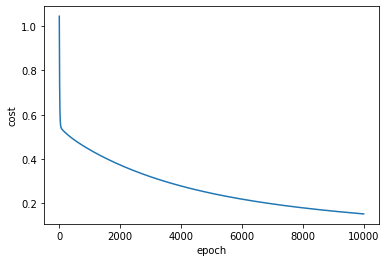

In [ ]:
plt.plot(vcost)
plt.xlabel('epoch')
plt.ylabel('cost')

**Test !**

In [ ]:
sess.run(hypothesis,feed_dict={X:[[5,3]]})

array([[0.9380905]], dtype=float32)

In [ ]:
sess.run(predicted,feed_dict={X:[[5,3]]})

array([[1.]], dtype=float32)

In [ ]:
sess.run(hypothesis,feed_dict={X:[[4,3]]})

array([[0.77904147]], dtype=float32)

In [ ]:
sess.run(predicted,feed_dict={X:[[4,3]]})

array([[1.]], dtype=float32)

In [ ]:
sess.run(hypothesis,feed_dict={X:[[1,0.2]]})

array([[0.01876073]], dtype=float32)